In [1]:
# Principal Components Analysis algorithm and dimensionality reduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [3]:
## PCA as a Dimensionality reduction

(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

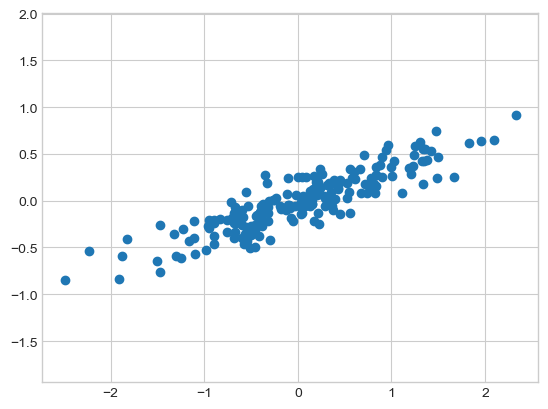

In [4]:
# Create dataset
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal')

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #reduce the dimension by two
pca.fit(X)

print("PCA components values: ", pca.components_)
print("PCA explained variance values: ", pca.explained_variance_)

PCA components values:  [[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]
PCA explained variance values:  [0.7625315 0.0184779]


Vector value:  [-2.47419458 -0.86089761]
Vector value:  [-0.1340136   0.38515116]


(-2.7292712056271964,
 2.5702744393352615,
 -0.9326181575178751,
 1.004413830229183)

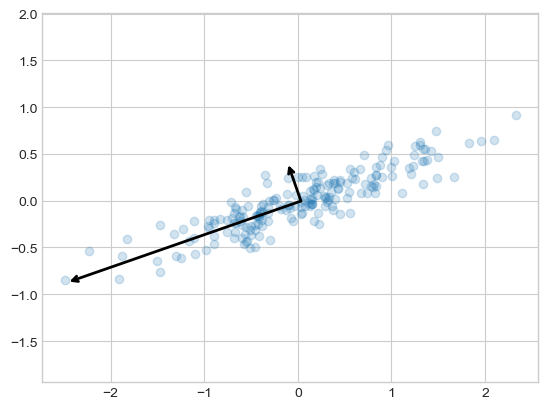

In [6]:
# Visualization of principal components
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle="->", linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print("Vector value: ", v)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

In [7]:
### The vectors represent the main axes of the data. 
### The length of each axis indicates how important the axis is in describing the distribution of the data.  
### This is a measure of the variance after projection onto that axis. Information along the least important axis is removed.

In [8]:
# Dimenstionality reduction
pca = PCA(n_components=1) #reduce the dimension by one
pca.fit(X)
X_pca = pca.transform(X)
print("Number of original dimension: ", X.shape)
print("Reduced dimension: ", X_pca.shape)

Number of original dimension:  (200, 2)
Reduced dimension:  (200, 1)


(-2.731158226766438, 2.609901883259332, -0.967276570638931, 1.006064230853995)

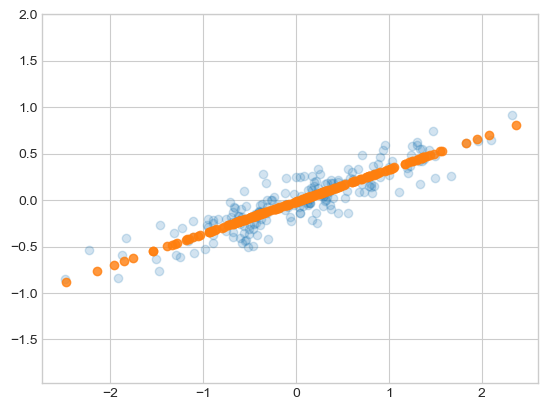

In [9]:
# Visualization of reduction effects
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal')

In [10]:
### The lighter points represent the original data, and the darker ones represent the result of the reduction.
### PCA works by reducing information along the least important principal component axis; 
### as a result of the PCA algorithm, only the components with the highest variance remain.